# Sparse Hebbian Learning 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

Extracting data..loading the data called : probe/cache_dir/data_data
Data is of shape : (65520, 324) - done in 0.13s.
No cache found probe/cache_dir/HULK_homeo_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   1025 (elapsed time:   0s,   0mn   0s)
Iteration  33 /   1025 (elapsed time:  18s,   0mn  18s)
Iteration  65 /   1025 (elapsed time:  35s,   0mn  35s)
Iteration  97 /   1025 (elapsed time:  51s,   0mn  51s)
Iteration  129 /   1025 (elapsed time:  68s,   1mn   8s)
Iteration  161 /   1025 (elapsed time:  85s,   1mn  25s)
Iteration  193 /   1025 (elapsed time:  101s,   1mn  41s)
Iteration  225 /   1025 (elapsed time:  118s,   1mn  58s)
Iteration  257 /   1025 (elapsed time:  135s,   2mn  15s)
Iteration  289 /   1025 (elapsed time:  152s,   2mn  32s)
Iteration  321 /   1025 (elapsed time:  172s,   2mn  52s)
Iteration  353 /   1025 (elapsed time:  203s,   3mn  23s)
Iteration  385 /   1025 (elapsed time:  236s,   3mn  56s)
Iteration  417 /   

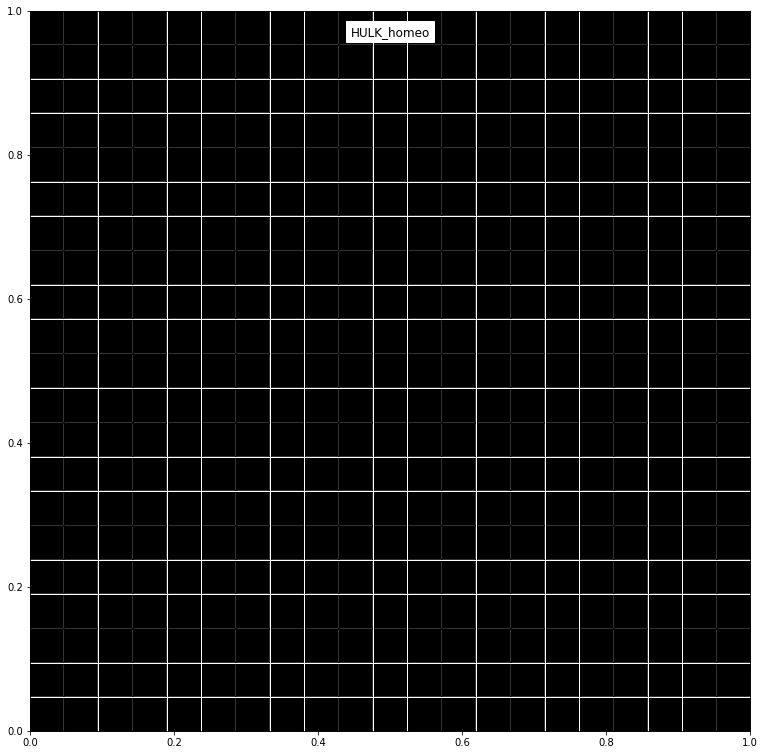

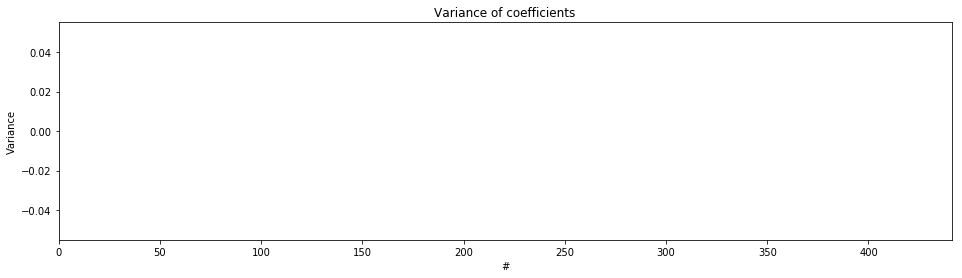

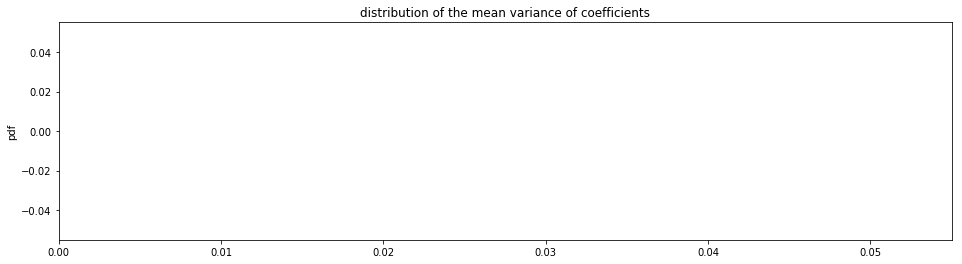

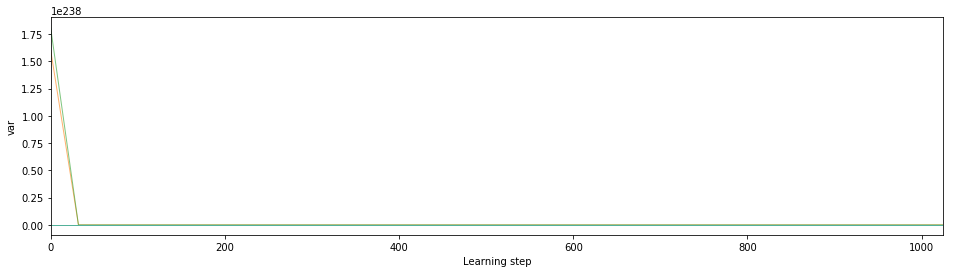

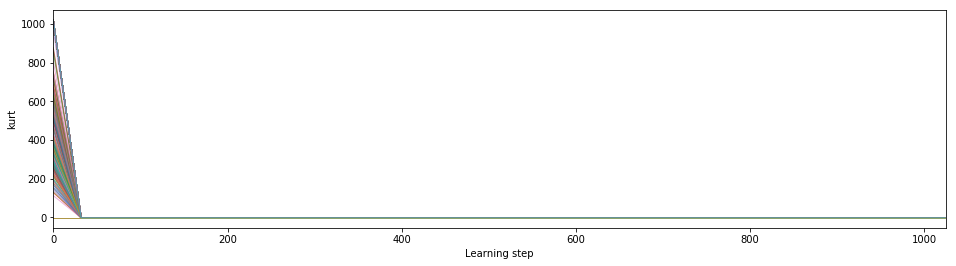

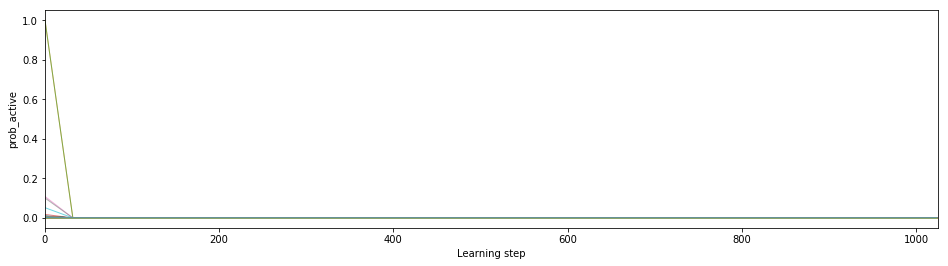

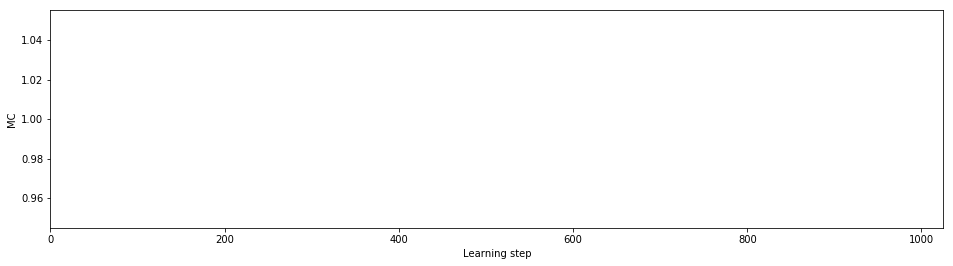

In [4]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var', 'time_plot_MC']
opts= dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose, cache_dir='probe/cache_dir', datapath='../database')
shl = SHL(**opts)
tag = 'HULK'
data = shl.get_data(matname='data')
dico = shl.learn_dico(data=data, matname=tag + '_homeo', list_figures=list_figures)   

### control: learning without homeostasis

During the learning, to avoid divergence, the norm of the filters is shunted to $1$.

No cache found probe/cache_dir/HULK_nohomeo_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   1025 (elapsed time:   1s,   0mn   1s)
Iteration  33 /   1025 (elapsed time:  34s,   0mn  34s)
Iteration  65 /   1025 (elapsed time:  66s,   1mn   6s)
Iteration  97 /   1025 (elapsed time:  97s,   1mn  37s)
Iteration  129 /   1025 (elapsed time:  130s,   2mn  10s)
Iteration  161 /   1025 (elapsed time:  161s,   2mn  41s)
Iteration  193 /   1025 (elapsed time:  193s,   3mn  13s)
Iteration  225 /   1025 (elapsed time:  225s,   3mn  45s)
Iteration  257 /   1025 (elapsed time:  257s,   4mn  17s)
Iteration  289 /   1025 (elapsed time:  288s,   4mn  48s)
Iteration  321 /   1025 (elapsed time:  321s,   5mn  21s)
Iteration  353 /   1025 (elapsed time:  353s,   5mn  53s)
Iteration  385 /   1025 (elapsed time:  385s,   6mn  25s)
Iteration  417 /   1025 (elapsed time:  417s,   6mn  57s)
Iteration  449 /   1025 (elapsed time:  449s,   7mn  29s)
Iteration  481 / 

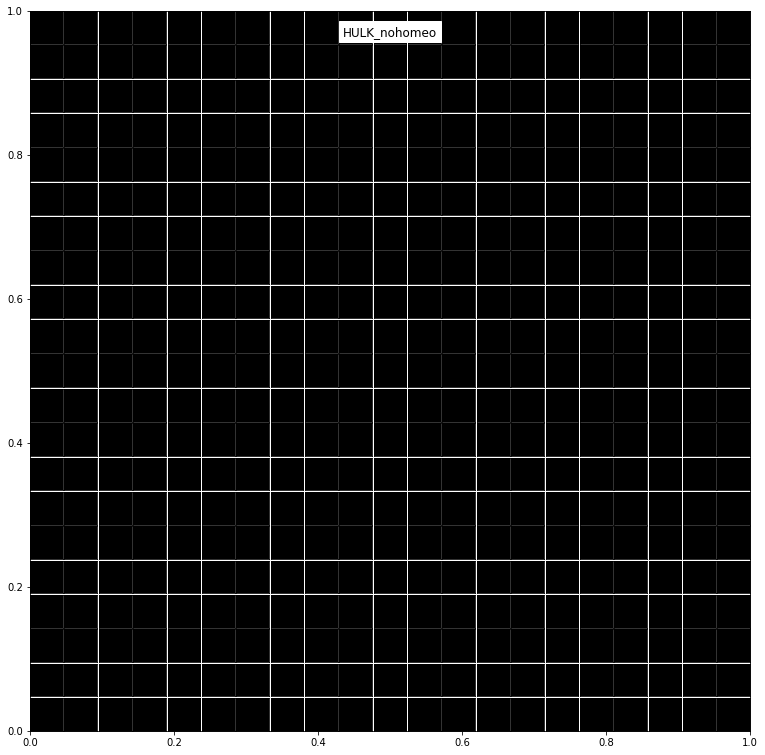

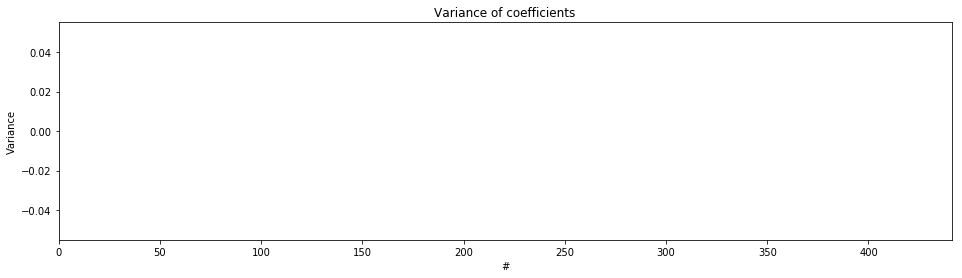

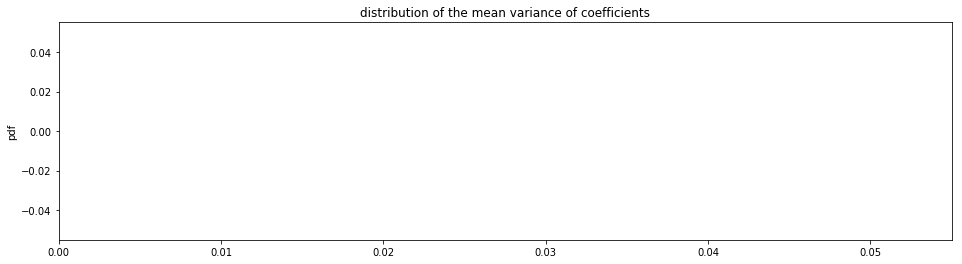

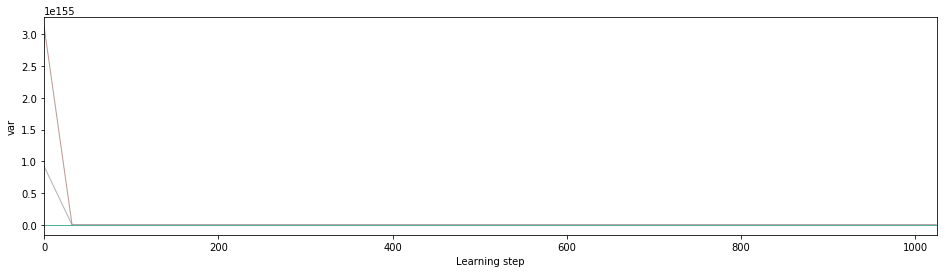

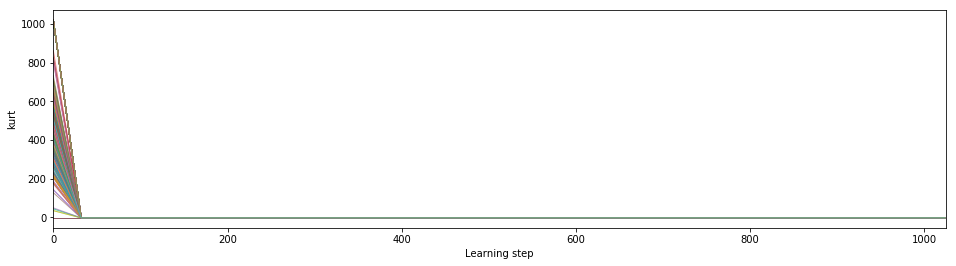

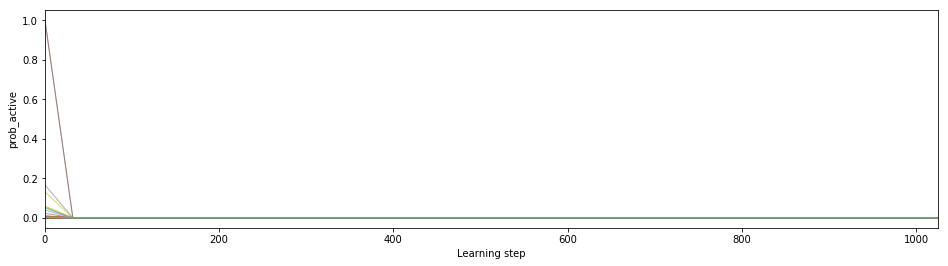

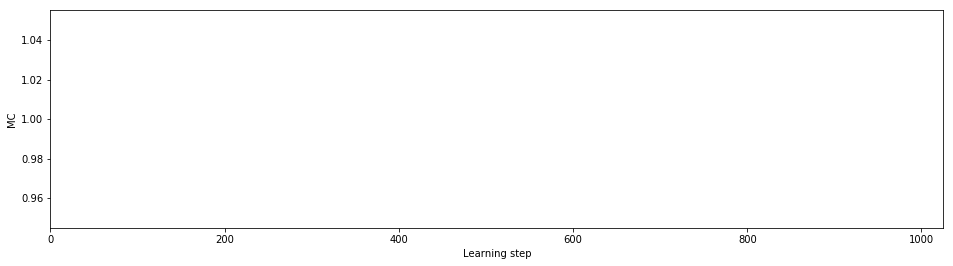

In [5]:
shl = SHL(homeo_method='None', **opts)
matname = tag + '_nohomeo'
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures) 

# Sparse Hebbian Learning : reproducing SparseNet

If we test the convergence of SparseNet as a function of different learning parameters, it shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters:

See :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the ``scikit-learn`` package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

## Version used

In [6]:
!rm -fr {shl.cache_dir}/{tag}*

[autoreload of prompt_toolkit failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/site-packages/prompt_toolkit/__init__.py", line 18, in <module>
 

In [7]:
!ls {shl.cache_dir}/HULK_*


ls: probe/cache_dir/HULK_*: No such file or directory


In [8]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.1
shl_scripts 20171221
Mon Sep 10 10:03:01 2018 CEST